In [67]:
# Libraries
import kaggle
import os
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Additional settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)

In [3]:
# Download Dataset using Kaggle API Key
# Requirements: Kaggle API key
if not os.path.isfile("data/fraudTrain.csv") or not os.path.isfile("data/fraudTest.csv"):
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files('kartik2112/fraud-detection', path='./data', unzip=True)

In [4]:
# Dataset Analysis
df_train = pd.read_csv('data/fraudTrain.csv', index_col=0)
df_test = pd.read_csv('data/fraudTest.csv', index_col=0)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [6]:
df_train.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
# Check missing values
# We don't need to impute the data because we don't have missing values
df_train.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
# Unique Val
df_train.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

 Not Fraud (0) 99.42%
 Is Fraud (1) 0.58%



<AxesSubplot:>

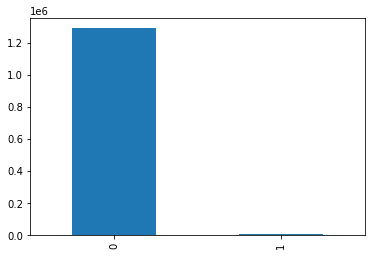

In [9]:
# Target Balance
target_count = df_train['is_fraud'].value_counts()
not_fraud, is_fraud = target_count[0], target_count[1]

print(f" Not Fraud (0) { round(not_fraud * 100 / sum(target_count),2)}%\n Is Fraud (1) {round(is_fraud * 100 / sum(target_count),2)}%\n")

target_count.plot(kind="bar")

In [69]:
# Correlation Matrix
# https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
corr = df_train.corr().round(2)
fig = px.imshow(corr)
fig.show()

In [11]:
# Cast Obj -> Datetime
# Train
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'], errors='ignore')
df_train['dob'] = pd.to_datetime(df_train['dob'], errors='ignore') # day of birth

# Test
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'], errors='ignore')
df_test['dob'] = pd.to_datetime(df_test['dob'], errors='ignore')

<AxesSubplot:>

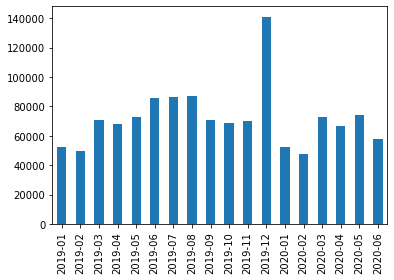

In [12]:
# Datetime
df_train['trans_date_trans_time'].dt.to_period('M').value_counts().sort_index().plot(kind="bar")

<AxesSubplot:>

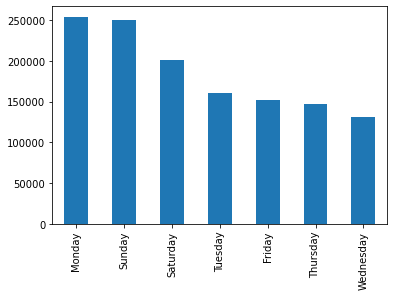

In [13]:
df_train['trans_date_trans_time'].dt.day_name().value_counts().plot(kind="bar")

<AxesSubplot:>

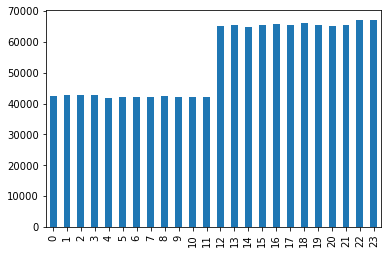

In [14]:
df_train['trans_date_trans_time'].dt.hour.value_counts().sort_index().plot(kind="bar")

<AxesSubplot:>

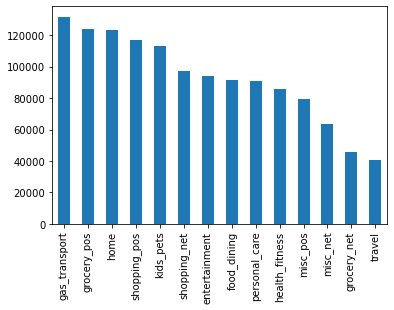

In [15]:
# Category
df_train['category'].value_counts().plot(kind="bar")

<AxesSubplot:>

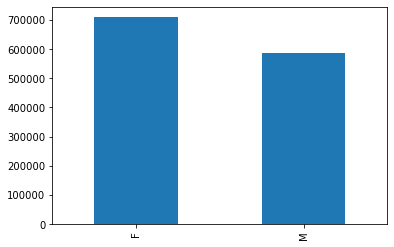

In [16]:
# Gender
df_train['gender'].value_counts().plot(kind="bar")

In [17]:
# Job
df_train['job'].value_counts(normalize=True)

Film/video editor             0.007542
Exhibition designer           0.007094
Naval architect               0.006697
Surveyor, land/geomatics      0.006694
Materials engineer            0.006378
                                ...   
Information officer           0.000006
Veterinary surgeon            0.000006
Ship broker                   0.000005
Contracting civil engineer    0.000005
Warehouse manager             0.000005
Name: job, Length: 494, dtype: float64

In [18]:
# City
df_train['city'].value_counts(normalize=True)

Birmingham     0.004332
San Antonio    0.003956
Utica          0.003937
Phoenix        0.003914
Meridian       0.003902
                 ...   
Vacaville      0.000005
Claypool       0.000005
Karns City     0.000005
Bruce          0.000005
Chattanooga    0.000005
Name: city, Length: 894, dtype: float64

In [19]:
# State
df_train['state'].value_counts(normalize=True)

TX    0.073169
NY    0.064396
PA    0.061578
CA    0.043465
OH    0.035846
        ...   
DC    0.002786
HI    0.001974
AK    0.001635
RI    0.000424
DE    0.000007
Name: state, Length: 51, dtype: float64

In [20]:
# Age
age = pd.DataFrame(np.round((df_train['trans_date_trans_time'] - df_train['dob']) / np.timedelta64(1,'Y')), columns=['age'])
age.astype({'age': 'int64'})
age.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,age
count,1.29668e+06
mean,45.9999
std,17.3963
min,14
25%,33
50%,44
75%,57
max,96


<AxesSubplot:>

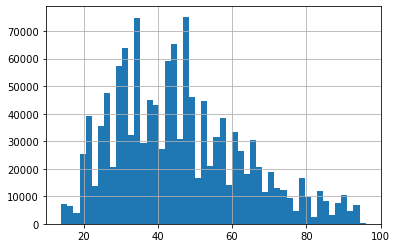

In [63]:
age['age'].hist(bins=50)

In [49]:
# Amount Transaction
all_amt = df_train[['amt','is_fraud']]
all_amt['amt'].describe().apply(lambda x: format(x, 'f'))

count    1296675.000000
mean          70.351035
std          160.316039
min            1.000000
25%            9.650000
50%           47.520000
75%           83.140000
max        28948.900000
Name: amt, dtype: object

<AxesSubplot:>

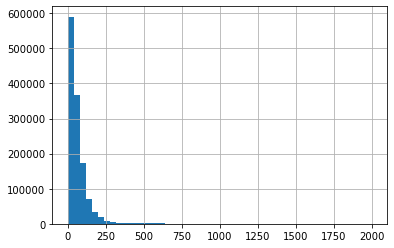

In [56]:
# Total Amount Transaction
all_amt.query("amt <= 2000")['amt'].hist(bins=50)

<AxesSubplot:>

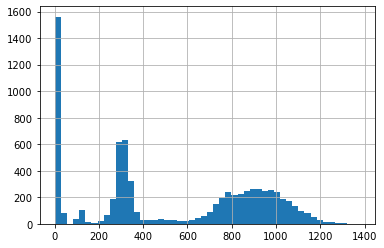

In [57]:
# Fraud Amount Transaction
all_amt.query("amt <= 2000 and is_fraud == 1")['amt'].hist(bins=50)

<AxesSubplot:>

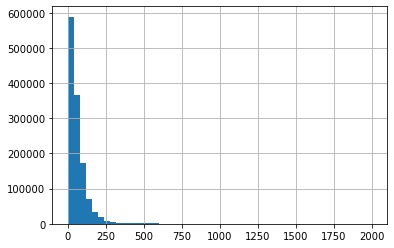

In [58]:
# No Fraud Amount Transaction
all_amt.query("amt <= 2000 and is_fraud == 0")['amt'].hist(bins=50)

<AxesSubplot:>

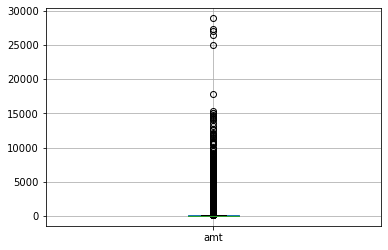

In [73]:
# Outlier
# https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
df_train.boxplot(column=['amt'])

In [74]:
# https://medium.com/nerd-for-tech/grouping-and-sampling-time-series-data-2bafe98302ab

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year_month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,2020-06
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,2020-06
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,2020-06
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,2020-06
